# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM             |         |


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [6]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final2.csv')
data.head(5)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

Sua resposta aqui.......

*Age: Idade do paciente

*Sex: Sexo do paciente

*Chest pain type:
Tipo de Dor no Peito:
Valor 1: angina típica
Valor 2: angina atípica
Valor 3: dor não anginal
Valor 4: assintomática


*Resting bp s: "Resting BP (Pressão Arterial em Repouso)" Valores normais de pressão arterial em repouso geralmente estão na faixa de 90/60 mmHg a 120/80 mmHg.



*Fasting Blood Sugar (Açúcar no Sangue em Jejum): Este atributo indica se o paciente tem níveis elevados de glicose no sangue após um período de jejum. A glicose é uma forma de açúcar que é a principal fonte de energia para as células do corpo. O valor deste atributo é binário, onde:

1: Indica que o nível de açúcar no sangue em jejum é maior que 120 mg/dL.
0: Indica que o nível de açúcar no sangue em jejum é igual ou inferior a 120 mg/dL.

*Resting ecg Resting Electrocardiogram Results (Resultados do Eletrocardiograma em Repouso): Este atributo indica os resultados do eletrocardiograma (ECG) do paciente enquanto ele está em repouso. O ECG é um teste que registra a atividade elétrica do coração ao longo do tempo. O valor deste atributo é nominal e pode assumir os seguintes valores:

0: Indica um resultado de ECG normal.
1: Indica a presença de anormalidades na onda ST-T, como inversões da onda T e/ou elevação ou depressão do segmento ST maiores que 0.05 mV.
2: Indica a presença de provável ou definitiva hipertrofia ventricular esquerda, conforme os critérios de Estes.


*Max heart rate
Batimento cardiaco maximo

*exercise angina: Angina Induzida por Exercício (Exercise Induced Angina): Este atributo indica se o paciente experimenta angina durante o exercício. Angina é uma dor ou desconforto no peito causado pela redução do suprimento sanguíneo para o coração. Se o valor for 1, significa que o paciente apresenta angina durante o exercício; se for 0, significa que não há angina durante o exercício.

*oldpeak: Este atributo se refere à depressão do segmento ST induzida pelo exercício em relação ao repouso. A depressão do segmento ST é uma medida importante no Eletrocardiograma (ECG) que pode indicar isquemia miocárdica (redução do fluxo sanguíneo para o músculo cardíaco). Um valor maior de Oldpeak indica uma maior depressão do segmento ST induzida pelo exercício.

*ST Slope (A inclinação do segmento ST): Este atributo se refere à forma da curva do segmento ST durante o pico do exercício. A inclinação do segmento ST é um indicador importante de isquemia miocárdica. Os valores possíveis são:

Valor 1: ascendente
Valor 2: plana
Valor 3: descendente

*Class: tem doença cardíaca ou normal




### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

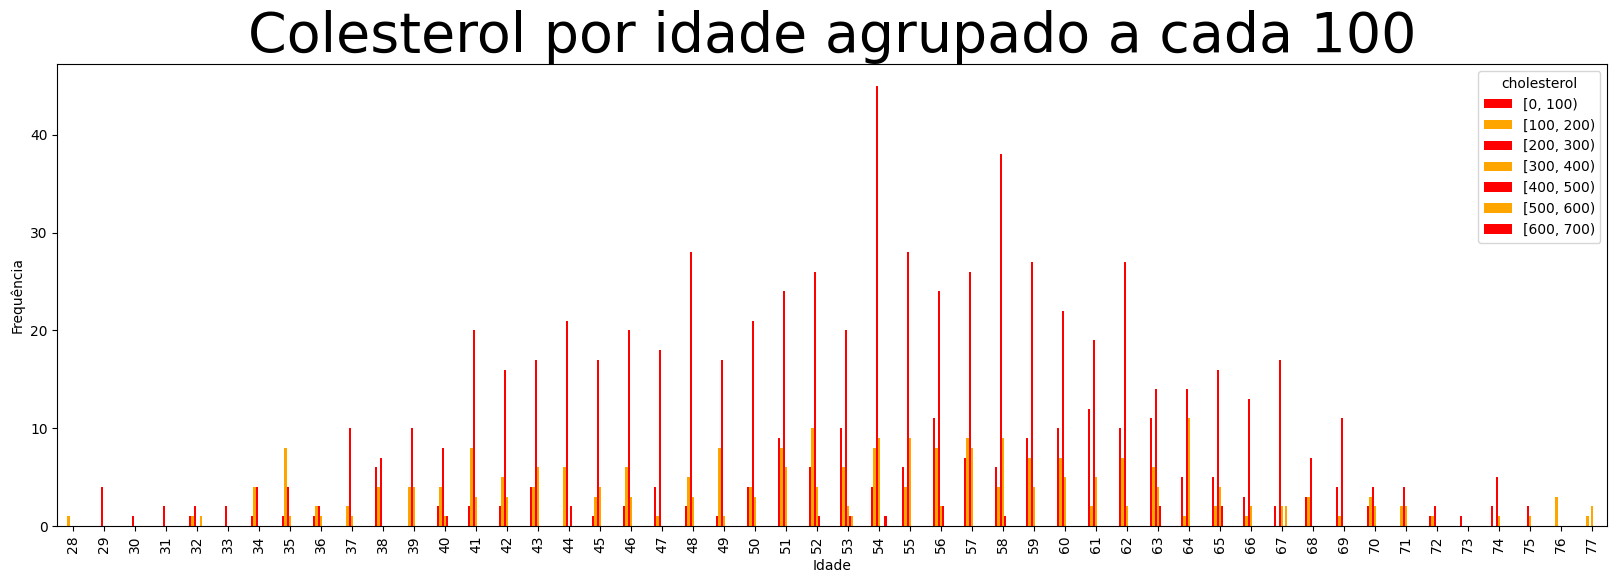

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo os intervalos de colesterol
intervalos_colesterol = pd.cut(data['cholesterol'], bins=range(0, 1000, 100), right=False)

# Criando a tabela cruzada com os intervalos de colesterol
cross_table = pd.crosstab(data['age'], intervalos_colesterol)
ax = cross_table.plot(kind="bar", figsize=(20, 6), color=['#FF0000', '#FFA500'])

plt.title('Colesterol por idade', fontsize=40)
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()


**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

**Respostas:**


Sua resposta aqui.... Lembre-se de relacionar sua resposta com os dados. Elabore análises gráficas para te auxiliar.

1.
2.
3.
4.


## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [5]:
#Seu Código aqui...



**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Sua resposta aqui.....

### Análise de Outliers

Faça a análise de outliers.

In [ ]:
#Seu Código aqui...

**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**


Sua resposta aqui...

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [9]:
#Seu Código aqui...


**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sua resposta aqui.....

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

In [ ]:
#Seu Código aqui...


**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**

Sua resposta aqui.....

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [ ] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [ ] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________
3. algoritimo ...___________


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________
3. algoritimo ...___________

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [2]:
#Seu Código aqui...



### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

In [ ]:
#Seu Código aqui...

x = class
y= (todos-invalidos)

### Divisão em treino e teste.

Faça o split do dados para treinamento e teste

In [2]:
#Seu Código aqui...



## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**


Sua resposta aqui.......

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1

In [18]:
#Seu Código aqui...




### Algoritmo 2

In [10]:
#Seu Código aqui...



### Algoritmo 3

In [17]:
#Seu Código aqui...


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      sua_resposta           |      sua_resposta                       |   sua_resposta              |
| teste  |      sua_resposta            |      sua_resposta                       |   sua_resposta              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

### Algoritmo 1

In [18]:
#Seu Código aqui...




### Algoritmo 2

In [10]:
#Seu Código aqui...



### Algoritmo 3

In [17]:
#Seu Código aqui...


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      sua_resposta           |      sua_resposta                       |   sua_resposta              |
| teste  |      sua_resposta            |      sua_resposta                       |   sua_resposta              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [26]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: